In [56]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pickle

## 1) Importing Data 

In [57]:
sp500=yf.download('^NSEI',start="2011-01-01", end="2015-12-31",interval='1d')

[*********************100%***********************]  1 of 1 completed


In [58]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,6177.450195,6178.549805,6147.200195,6157.600098,6157.600098,0
2011-01-04,6172.750000,6181.049805,6124.399902,6146.350098,6146.350098,0
2011-01-05,6141.350098,6141.350098,6062.350098,6079.799805,6079.799805,0
2011-01-06,6107.000000,6116.149902,6022.299805,6048.250000,6048.250000,0
2011-01-07,6030.899902,6051.200195,5883.600098,5904.600098,5904.600098,0


In [59]:
sp500['Returns %']=sp500['Adj Close'].diff() / sp500['Adj Close']

In [60]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume,Returns %
Date,,,,,,,
2011-01-03,6177.450195,6178.549805,6147.200195,6157.600098,6157.600098,0,NaN
2011-01-04,6172.750000,6181.049805,6124.399902,6146.350098,6146.350098,0,-0.001830
2011-01-05,6141.350098,6141.350098,6062.350098,6079.799805,6079.799805,0,-0.010946
2011-01-06,6107.000000,6116.149902,6022.299805,6048.250000,6048.250000,0,-0.005216
2011-01-07,6030.899902,6051.200195,5883.600098,5904.600098,5904.600098,0,-0.024328


<AxesSubplot:xlabel='Date'>

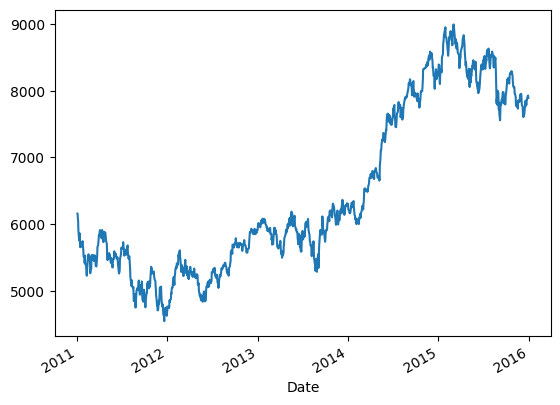

In [61]:
sp500['Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

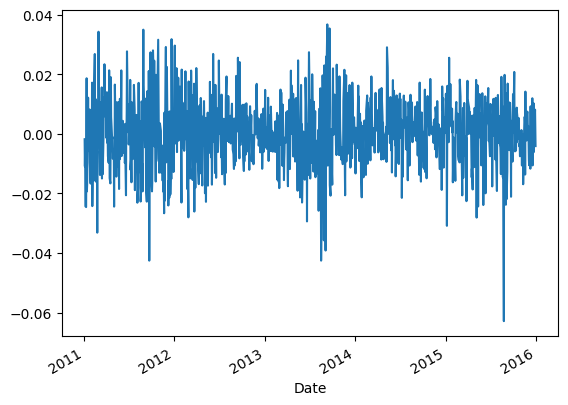

In [62]:
sp500['Returns %'].plot()

In [63]:
# sp500['Adj Close'].ewm(span=100).mean().plot()

In [64]:
# sp500['Adj Close']=sp500['Adj Close'].ewm(span=80).mean()

<AxesSubplot:xlabel='Date'>

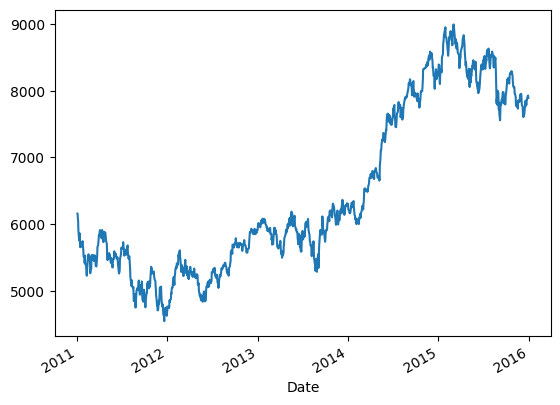

In [65]:
sp500['Adj Close'].plot()

The cyclical component represents phenomena that happen across seasonal periods. Cyclical patterns do not have a fixed period like seasonal patterns do. An example of a cyclical pattern is the cycles of boom and bust that stock markets experience in response to world events. <br>
This data seems to have cyclical component with no consistent cyclicity. So instead of decomposing it into trend, seasonality, noise, we would just keep it as it is.

In [66]:
sp500['Adj Close'].shape

(1214,)

Figure(640x480)


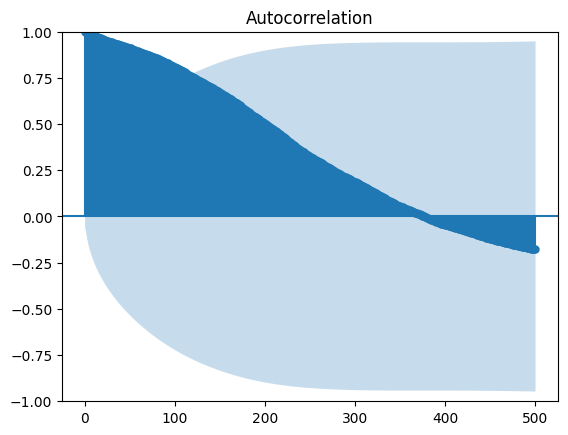

In [67]:
print(plot_acf(sp500['Adj Close'],lags=500))

Also autocorrelation graph shows no seasonal pattern.

## 2) Decomposition of Data 

In [68]:
sp500_decomposition = seasonal_decompose(x=sp500['Adj Close'], model='additive', period=45)

### 2.1) Trend 

<AxesSubplot:xlabel='Date'>

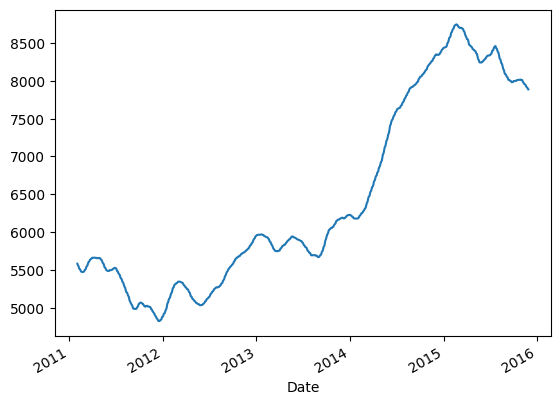

In [69]:
sp500_decomposition.trend.plot()

### 2.2) Seasonal 

<AxesSubplot:xlabel='Date'>

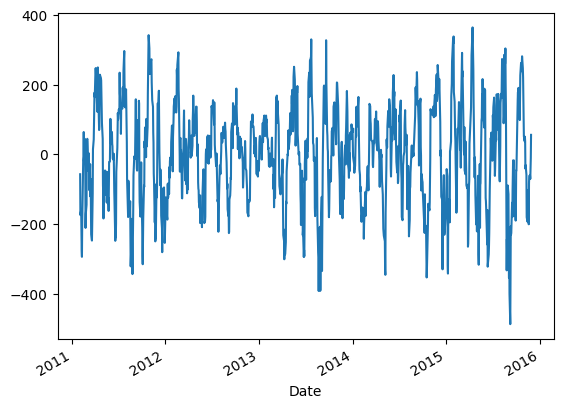

In [70]:
(sp500_decomposition.seasonal+sp500_decomposition.resid).plot()

<AxesSubplot:xlabel='Date'>

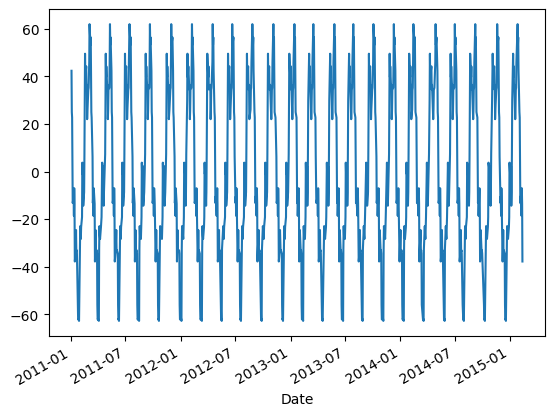

In [71]:
sp500_decomposition.seasonal[:1000].plot()

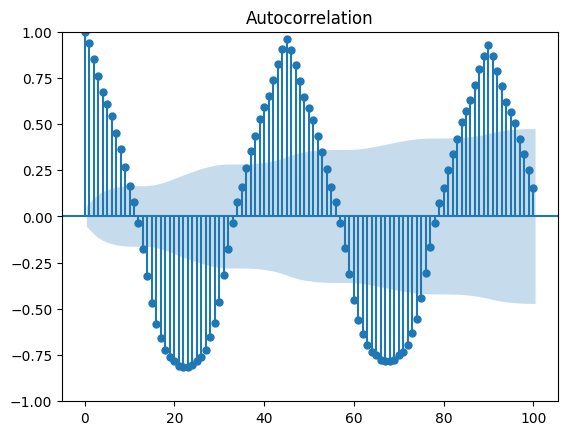

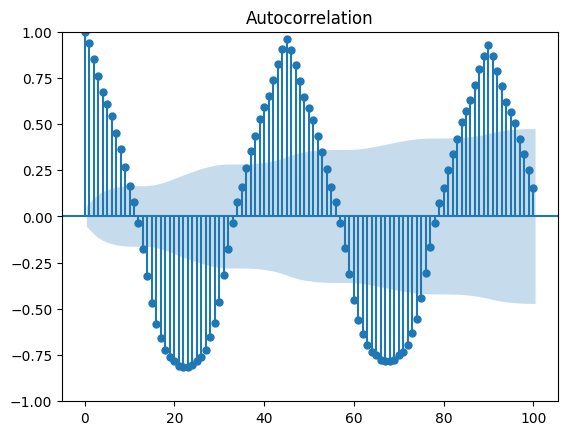

In [72]:
plot_acf(sp500_decomposition.seasonal,lags=100)

### 2.3) Residual 

<AxesSubplot:xlabel='Date'>

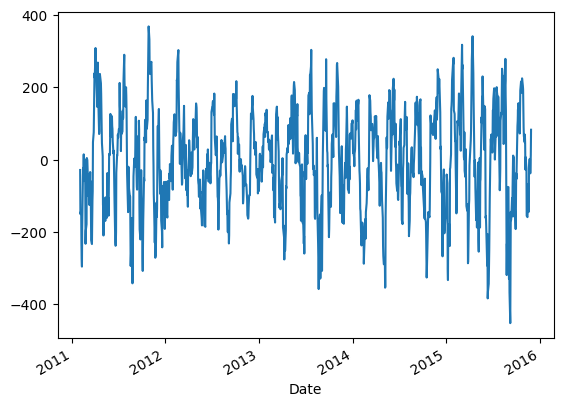

In [73]:
sp500_decomposition.resid.dropna().plot()

## 3) Stationarity Test

<AxesSubplot:xlabel='Date'>

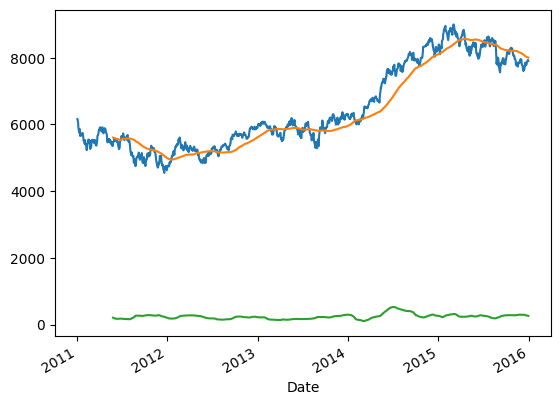

In [74]:
sp500['Adj Close'].plot()
sp500['Adj Close'].rolling(100).mean().plot()
sp500['Adj Close'].rolling(100).std().plot()

### 3.1) Constant Mean Test

In [75]:
# difference between max and min mean
( sp500['Adj Close'].rolling(500).mean().max() - sp500['Adj Close'].rolling(500).mean().min() ) * 100 / sp500['Adj Close'].rolling(500).mean().max()
# The mean appears to be constant considering the value of mean, since the difference between minimum and max is about 17% from it's max value

31.015293917150736

In [76]:
# chunks = np.split(monthly_temp.temp, indices_or_sections=12)

### 3.2) Constant Std Test

In [77]:
# difference between max and min mean
( sp500['Adj Close'].rolling(500).std().max() - sp500['Adj Close'].rolling(500).std().min() ) * 100 / sp500['Adj Close'].rolling(500).std().max()
# the standard deviation is not constant

69.2860019682495

### 3.3) Dickey Fuller Test 

In [78]:
adf_sp500, pvalue_sp500, usedlag_, nobs_, critical_values_sp500, icbest_ = adfuller(sp500['Adj Close'])
pvalue_sp500

0.8544054963370226

The pvalue of dickey fuller should be below 0.05. <br>
The next dickey fuller test would be conducted on a data after removing autocorrelation with differencing. 

In [79]:
sp500_diff=sp500['Adj Close'].diff(periods=1)[~np.isnan(sp500['Adj Close'].diff(periods=1))]
adf_sp500_diff, pvalue_sp500_diff, usedlag_diff, nobs_diff, critical_values_sp500, icbest_diff = adfuller(sp500_diff)
pvalue_sp500_diff

0.0

The value is lower than 0.05 so, the stationary test is passed.

<AxesSubplot:xlabel='Date'>

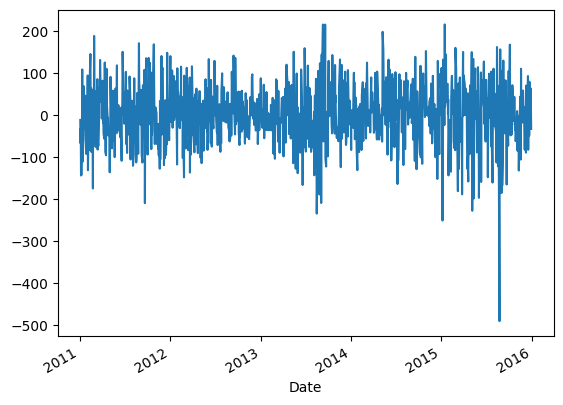

In [80]:
sp500_diff.plot()

### 3.4) Autocorrelation Tests 

Figure(640x480)
Figure(640x480)


C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


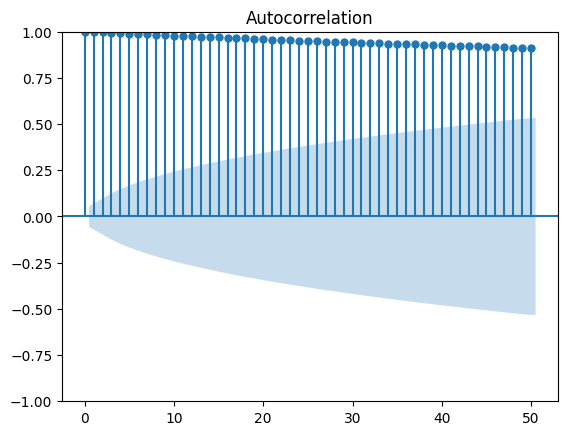

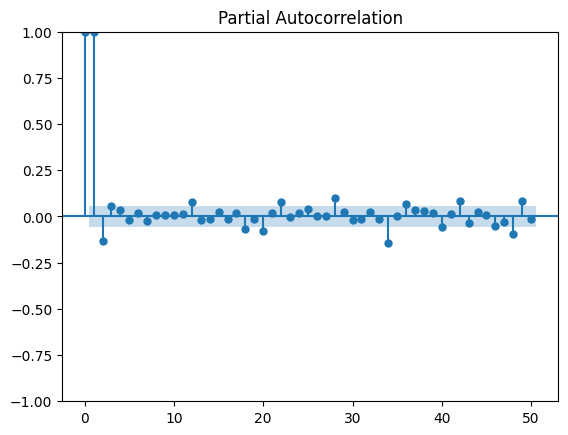

In [81]:
print(plot_acf(sp500['Adj Close'],lags=50))
print(plot_pacf(sp500['Adj Close'],lags=50))

In [27]:
# difference data

Figure(640x480)
Figure(640x480)


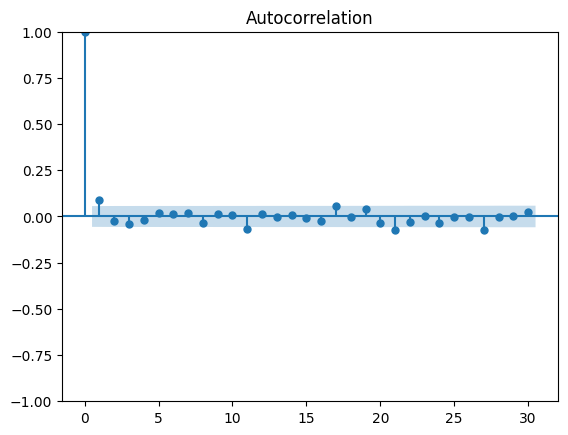

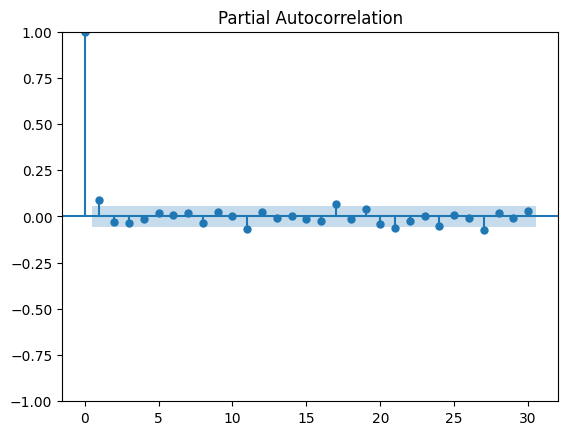

In [102]:
print(plot_acf(np.log(sp500.loc[~np.isnan(np.array(sp500['Returns %'])),'Returns %']+1),lags=30))
print(plot_pacf(np.log(sp500.loc[~np.isnan(np.array(sp500['Returns %'])),'Returns %']+1),lags=30))

## 4) Model

In [85]:
sp500.loc[~np.isnan(np.array(sp500['Returns %'])),'Returns %']

Date
2011-01-04   -0.001830
2011-01-05   -0.010946
2011-01-06   -0.005216
2011-01-07   -0.024328
2011-01-10   -0.024597
                ...   
2015-12-23    0.010151
2015-12-24   -0.000623
2015-12-28    0.008088
2015-12-29    0.000479
2015-12-30   -0.004141
Name: Returns %, Length: 1213, dtype: float64

In [122]:
sar = sm.tsa.statespace.SARIMAX(np.log(sp500.loc[~np.isnan(np.array(sp500['Returns %'])),'Returns %']+1), 
                                order=(1,0,1), 
                                seasonal_order=(0,0,0,0), 
                                trend='c').fit()
sar.summary()

# sarima model without seasonality is arima model

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Returns %   No. Observations:                 1213
Model:               SARIMAX(1, 0, 1)   Log Likelihood                3778.695
Date:                Wed, 08 Mar 2023   AIC                          -7549.389
Time:                        00:25:33   BIC                          -7528.986
Sample:                             0   HQIC                         -7541.707
                               - 1213                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.427e-05      0.000      0.255      0.799      -0.001       0.001
ar.L1         -0.0961      0.278     -0.345      0.730      -0.642       0.450
ma.L1          0.1878      0.273      0.687      0.492      -0.348       0.723
sigma2         0.0001   3.43e-06     33.596      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               175.65
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [123]:
'''with open('nifty_08_12.pkl', 'wb') as f:
    pickle.dump(sar, f) '''

"with open('nifty_08_12.pkl', 'wb') as f:\n    pickle.dump(sar, f) "

In [124]:
'''with open('nifty_08_12.pkl', 'rb') as f:
    sar = pickle.load(f) '''

"with open('nifty_08_12.pkl', 'rb') as f:\n    sar = pickle.load(f) "

<AxesSubplot:xlabel='Date'>

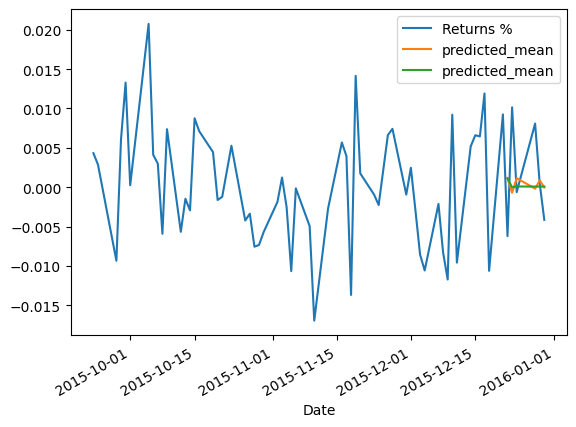

In [133]:
pd.plotting.register_matplotlib_converters()
#use model.predict() start and end in relation to series
 

sp500['Returns %'][1150:].plot(legend=True)
sar.predict(start=1207).plot(legend=True)
sar.predict(start=1207,dynamic=True).plot(legend=True)
# sar.forecast(steps=100).plot()
# sp500[730:][['Adj Close', 'Adj Close Forecast']].plot();

In [208]:
sp500_fore=yf.download('^NSEI',start="2016-01-01", end="2016-05-15",interval='1d')
sp500_fore['Adj Close']

[*********************100%***********************]  1 of 1 completed


Date
2016-01-04    7791.299805
2016-01-05    7784.649902
2016-01-06    7741.000000
2016-01-07    7568.299805
2016-01-08    7601.350098
                 ...     
2016-05-09    7866.049805
2016-05-10    7887.799805
2016-05-11    7848.850098
2016-05-12    7900.399902
2016-05-13    7814.899902
Name: Adj Close, Length: 88, dtype: float64

In [209]:
sp500_fore['Returns %']=sp500_fore['Adj Close'].diff() / sp500_fore['Adj Close']

In [210]:
# np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1)

In [211]:
# np.log(sp500.loc[~np.isnan(np.array(sp500['Returns %'])),'Returns %']+1).append(sp500_fore['Adj Close'])

In [212]:
def dynamic_pred(df,df1):
    len_df=len(df)
    pred_df=pd.Series()
    for y,x in df1.items():
        sar = sm.tsa.statespace.SARIMAX(df, 
                                order=(1,0,1), 
                                seasonal_order=(0,0,0,0), 
                                trend='c').fit()
        pred=sar.forecast(steps=1)
        
        x=pd.Series([x],index=[y])
        pred.index=x.index
        pred_df=pred_df.append(pred)
        if len(df)==len_df+len(df1):
            break
        else:
            df=df.append(x)
              
    return pred_df

In [213]:
sp500_for=dynamic_pred(np.log(sp500.loc[~np.isnan(np.array(sp500['Returns %'])),'Returns %']+1),np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1))

C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pred_df=pd.Series()
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fa

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\b

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\sit

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\sit

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\b

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\sit

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\b

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\sit

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\sit

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\sit

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\sit

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\b

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_df=pred_df.append(pred)
C:\Users\hp\AppData\Local\Temp\ipykernel_3476\2056839690.py:17: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(x)
C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\miniconda3\envs\kirtesh\lib\sit

<AxesSubplot:xlabel='Date'>

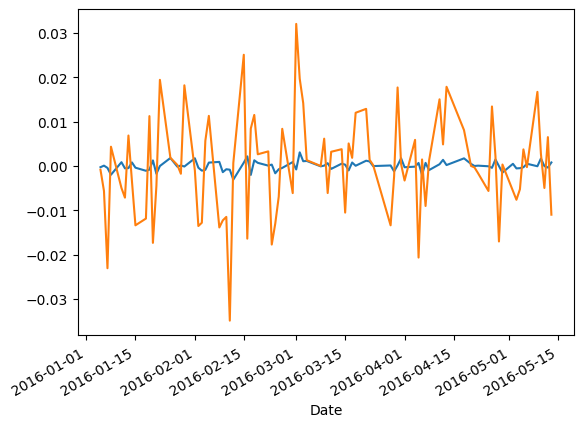

In [214]:
sp500_for.plot()
np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1).plot()

In [215]:
np.sign(np.array(sp500_for))==np.sign(np.array(np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1)))

array([ True, False,  True, False, False,  True, False, False,  True,
        True, False, False,  True, False,  True, False, False, False,
       False,  True,  True, False,  True, False,  True,  True,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True, False, False,  True,  True, False,
       False, False,  True,  True, False, False])

In [216]:
def accuracy_sarimax(df1,df2):
    x=np.sign(np.array(df1))==np.sign(np.array(df2))
    
    return sum(x) / len(x)

In [217]:
accuracy_sarimax(sp500_for,np.log(sp500_fore.loc[~np.isnan(np.array(sp500_fore['Returns %'])),'Returns %']+1))

0.5287356321839081

In [126]:
sp500_fore=yf.download('^NSEI',start="2016-01-01", end="2016-03-30",interval='1d')
sp500['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [127]:
sp500_fore.shape

(61, 6)

<AxesSubplot:xlabel='Date'>

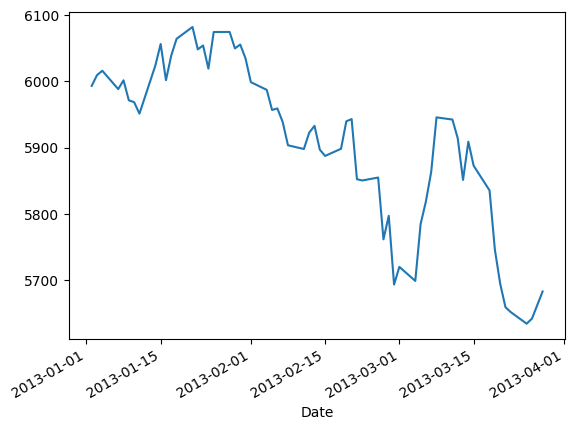

In [109]:
sp500_fore['Adj Close'].plot()

In [141]:
sp500_for=sar.forecast(steps=sp500_fore.shape[0])
sp500_for.index=sp500_fore.index
sp500_for

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1213   -0.000282
1214    0.000121
1215    0.000083
1216    0.000086
1217    0.000086
1218    0.000086
1219    0.000086
1220    0.000086
1221    0.000086
Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

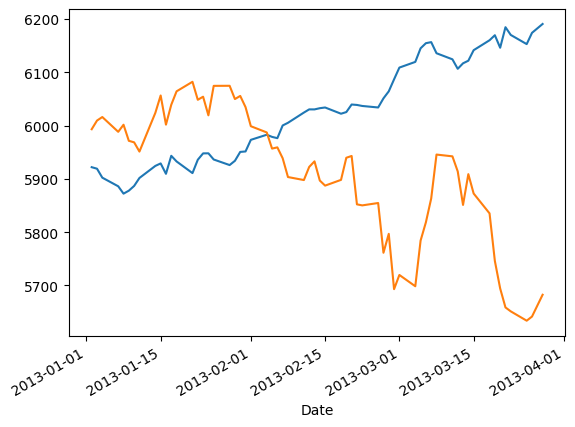

In [111]:
sp500_for.plot()
sp500_fore['Adj Close'].plot()